In [1]:
"hide_input"
turtles <- read.csv("../Data/turtles.csv")

[1] "hide_input"

In [2]:
head(turtles)

Length,Width,Height,Gender
98,81,38,female
103,84,38,female
103,86,42,female
105,86,42,female
109,88,44,female
123,92,50,female


In [3]:
tail(turtles)

,Length,Width,Height,Gender
43,121,95,42,male
44,125,93,45,male
45,127,96,45,male
46,128,95,45,male
47,131,95,46,male
48,135,106,47,male


In [4]:
males <- turtles[25:48, 1:3]

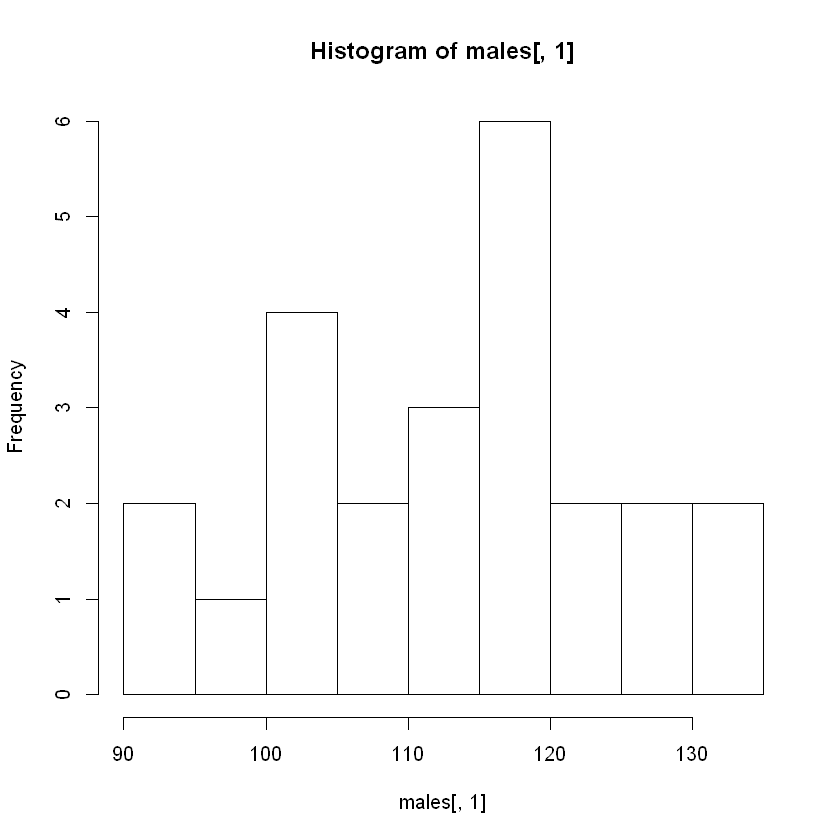

In [5]:
hist(males[,1])

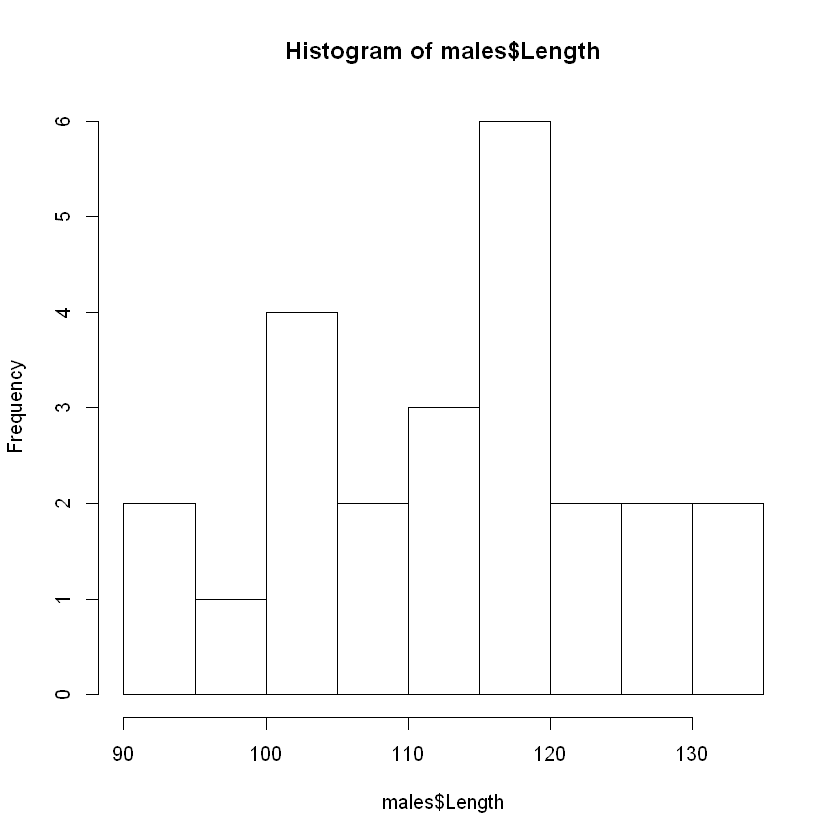

In [6]:
hist(males$Length)

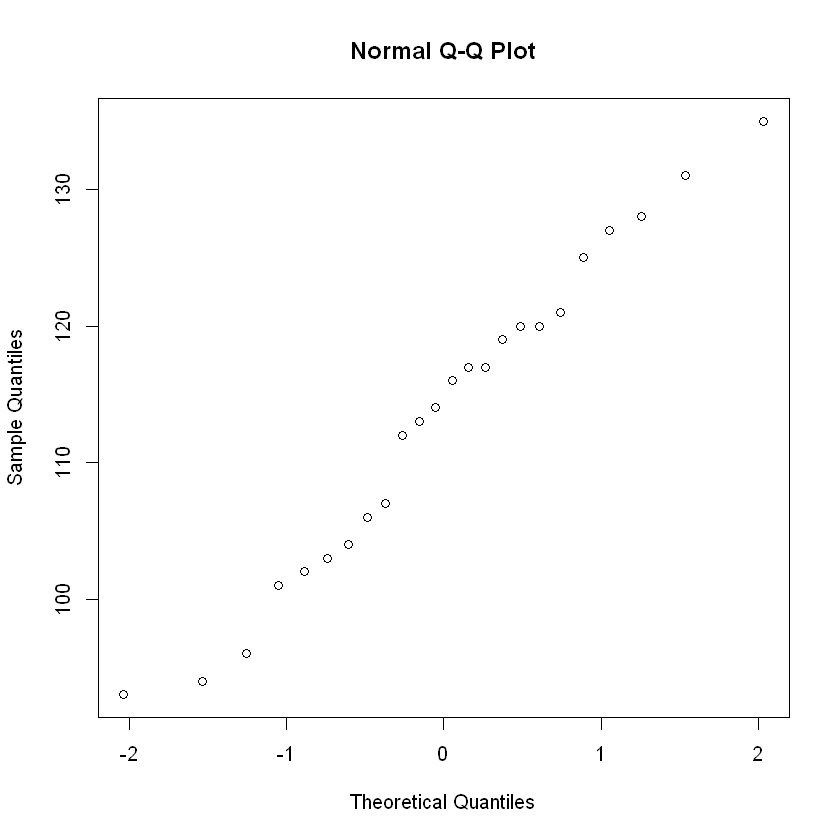

In [7]:
qqnorm(males$Length)

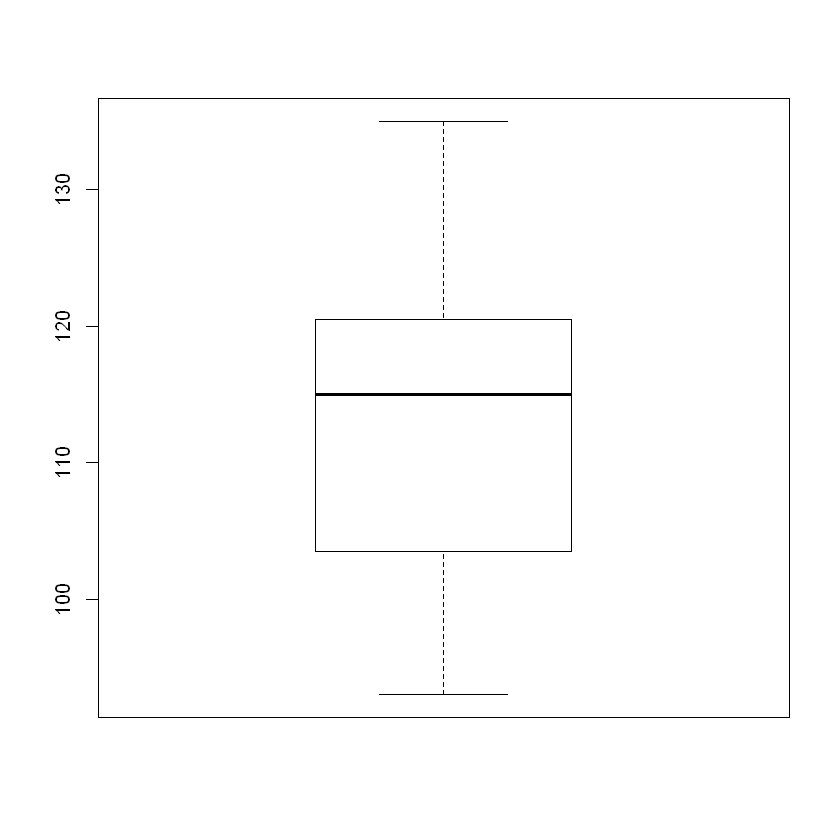

In [8]:
boxplot(males$Length)

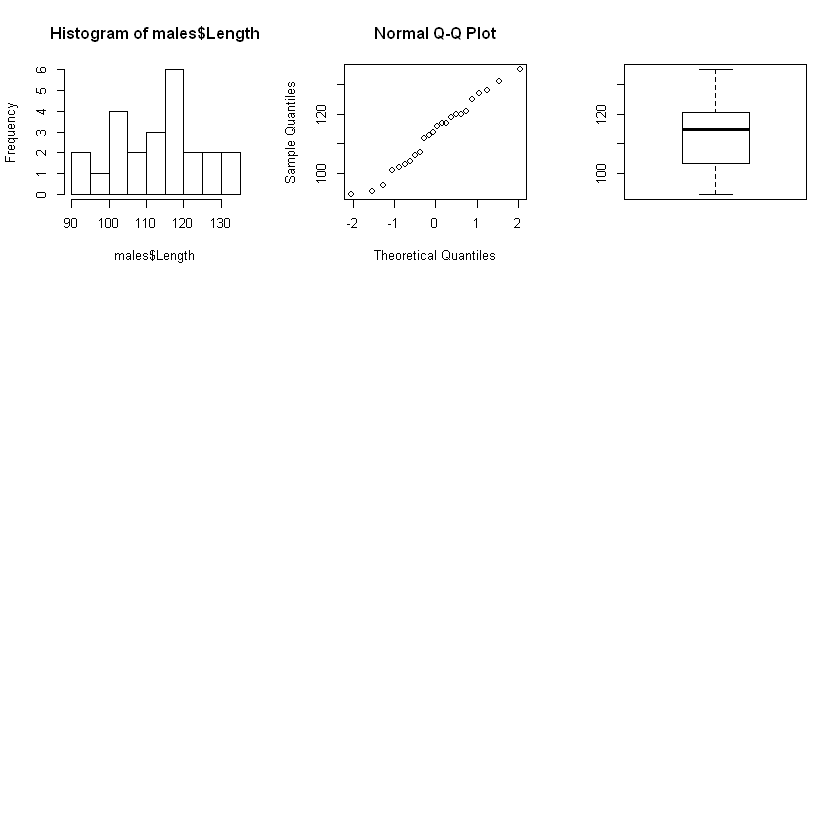

In [9]:
par(mfrow=c(3,3))
hist(males$Length)
qqnorm(males$Length)
boxplot(males$Length)

In [10]:
par(mfrow=c(1,1))
one <- rep(1,24)
(1/24*t(one))

0.04166667,0.04166667,0.04166667,0.04166667,0.04166667,0.04166667,0.04166667,0.04166667,0.04166667,0.04166667,...,0.04166667,0.04166667,0.04166667,0.04166667,0.04166667,0.04166667,0.04166667,0.04166667,0.04166667,0.04166667


```R 
%*% # is matrix multiplication
```

In [11]:
is.matrix(males)

[1] FALSE

In [12]:
is.data.frame(males)

[1] TRUE

In [13]:
# Convert to a matrix:
(1/24)*t(one)%*%as.matrix(males)

Length,Width,Height
113.375,88.29167,40.70833


In [14]:
apply(males,2,mean) # 2 means you are applying it to columns. 1 Means you are applying it to the rows.

Length     Width    Height 
113.37500  88.29167  40.70833

In [15]:
males.cov=cov(males) #variance covariance matrix
males.cov

,Length,Width,Height
Length,138.76630,79.14674,37.37500
Width,79.14674,50.04167,21.65399
Height,37.37500,21.65399,11.25906


In [17]:
males.cor = cor(males)

In [18]:
males.cor

,Length,Width,Height
Length,1.0000000,0.9497846,0.9455580
Width,0.9497846,1.0000000,0.9122648
Height,0.9455580,0.9122648,1.0000000


In [19]:
males.eig=eigen(males.cov)

In [20]:
males.eig$values

[1] 195.274633   3.688564   1.103833

In [21]:
100*males.eig$values/sum(males.eig$values)

[1] 97.6046046  1.8436640  0.5517314

Above is 1.8% and .55% 

In [22]:
males.eig$vectors

0.8401219,0.48810477,-0.23653541
0.4919082,-0.86938426,-0.04687583
0.2285205,0.07697229,0.97049145


In the homework we extract the first eigen vector and then manipulating it.

The last eigen vector is putting all the weight on the height of the shell.

In [23]:
males.evec1=males.eig$vectors[,1] # This code extracts the first eigen vector.

In [24]:
males.evec1

[1] 0.8401219 0.4919082 0.2285205

In [25]:
males.evec1

[1] 0.8401219 0.4919082 0.2285205

In [26]:
t(males.evec1)%*%males.cov%*%males.evec1 # t() appears to take the transpose
# This is the same calculation as above.

195.2746


* How do you interpret an eigen vector.
The eigen vector will go through the point of averages. 

$\lambda_1$ = eigen value
$v_1$ = eigen vector
* Lookup a unit vector it is part of the definition of the equation on question 5 of homework 1
The eigen vectors are the principals components in PCA.
* Study Correlation matrix an covariance matrix in regards to PCA.
If you do it on the correlation matrix you will find that the weights are very similar. These are the first ones in the column.

In [1]:
 # help(cor) #Enter functions into the help function to read about them.

If there is a difference in dimensionality in the data sets then we need to be able to reveal this. Is the data 1D, 2D, 3D or more. If we can reveal this then we will have a better idea of how to analyze the data.
1. Find the direction $v_1$ such that the spread in the direction of $v_1$ is the greatest among all possible (unit) vectors.
2. Find the direction $v_2$, with $v_2$ $\perp$ $v_1$, such that the spread in the direction $v_2$ is the greatest among all unit vectors that are orthogonal to $v_1$
3. Find the direction: $v_k$, $v_k$ is orthogonal to $v_{k-1}$,$v_k$ is orthogonal to $v_{k-2}$...$v_k$ is orthogonal to $v_1$ such that the spread in the $v_k$ is the greatest among all unit vectors orthogonal to $v_1$, $v_2$ up to $v_{k-1}$

It turns out that $v_1$ is the eigenvector of s corresponding to the largest eigen value.
$v_k$ is the eigenvector of s corresponding to the $k^th$ largest eigenvalue of s.

The eigen value $\lambda_1$ = $\lambda_{max}$ gives the amount of spread in the direction of $v_1$.

Total vairation = trace(s) = $\sum_{j=1}^q s_{jj}$ = $\sum_{j=1}^q s_{jj}^2$ = $\sum_{j=1}^q \lambda_i$

Book: Matrices with applications in statistics - ethan greybill

$\perp$ = orthogonal symbol

# Principal Components Analysis (PCA)

The eigenvectors are referred to as principal components and they are the principal components of Eigenvalues.

In [ ]:
eigen(males.cor)

In [28]:
males.eig=eigen(males.cor)

In [29]:
100*males.eig$values/sum(males.eig$values)

[1] 95.727925  2.928619  1.343455

Preference is to use the covariance matrix but there are many problems where that is not true.

# 1/22/19
$Relh_1 - Relh_{12} -->$ Avg of 12 months (Relh Ave) = $\frac{1}{12}\sum_{i=1}^{12}{Relh_i}$